## **Regresion Lineal**

## **1.Instalaciones**

In [78]:
!pip install lazypredict
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import shap
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from lazypredict.Supervised import LazyRegressor
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error



## **2.Subimos Database**

In [7]:
from google.colab import files
uploaded = files.upload()

Saving internal-link.csv to internal-link.csv


## **3. Abrimos Database**

In [8]:
df = pd.read_csv('internal-link.csv', sep=',')
pd.set_option('display.max_columns', None)
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
5,31,female,25.74,0,no,southeast,3756.62
6,46,female,33.44,1,no,southeast,8240.59
7,37,female,27.74,3,no,northwest,7281.51
8,37,male,29.83,2,no,northeast,6406.41
9,60,female,25.84,0,no,northwest,28923.14


In [9]:
df.shape

(1338, 7)

## **4.Revisamos que valores toman las Columnas:**

In [10]:
for col in df.columns:
    print(f"\nColumna: {col}")

    # Conteos absolutos
    conteos = df[col].value_counts(dropna=False)

    # Porcentajes
    porcentajes = df[col].value_counts(normalize=True, dropna=False) * 100

    # Combinar en un solo DataFrame
    resumen = pd.DataFrame({
        'Conteo': conteos,
        'Porcentaje (%)': porcentajes.round(2)
    })

    print(resumen)


Columna: age
     Conteo  Porcentaje (%)
age                        
18       69            5.16
19       68            5.08
46       29            2.17
52       29            2.17
50       29            2.17
47       29            2.17
48       29            2.17
51       29            2.17
45       29            2.17
20       29            2.17
24       28            2.09
27       28            2.09
28       28            2.09
25       28            2.09
23       28            2.09
49       28            2.09
54       28            2.09
53       28            2.09
22       28            2.09
21       28            2.09
26       28            2.09
31       27            2.02
41       27            2.02
44       27            2.02
43       27            2.02
42       27            2.02
29       27            2.02
30       27            2.02
40       27            2.02
32       26            1.94
33       26            1.94
57       26            1.94
34       26            1.94
55    

## **5. Reemplazamos las palabras NAN NULL UNKNOWN NOENXISTENT 999 POR NAN en nuestro Dataset** No tenemos que hacer nada.

## **6.. Identificar columnas con columnas constantes**

In [11]:
unicos = df.nunique()
df[unicos[unicos==1].index]
df[unicos[unicos==1].index].head(5)

""
0
1
2
3
4


## **7. Eliminamos filas y columnas duplicadas** Me sale fila duplicada. Pero no la elimino

In [12]:
df.duplicated().sum()

np.int64(1)

In [13]:
df[df.duplicated(keep=False)]


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.56
581,19,male,30.59,0,no,northwest,1639.56


In [14]:
df.T.duplicated().sum()

np.int64(0)

In [15]:
df.T.duplicated(keep=False)

,0
age,False
sex,False
bmi,False
children,False
smoker,False
region,False
charges,False


## **8. Eliminamos Columnas redundantes**

In [16]:
pd.set_option('display.max_columns', None)
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
5,31,female,25.74,0,no,southeast,3756.62
6,46,female,33.44,1,no,southeast,8240.59
7,37,female,27.74,3,no,northwest,7281.51
8,37,male,29.83,2,no,northeast,6406.41
9,60,female,25.84,0,no,northwest,28923.14


## **9.Eliminar columnas Data leakage**

In [17]:
##df.drop('deposito', axis=1, inplace=True)

## **10. Valores faltantes por columna** Tiene que ser mayor a 40 % Para poder eliminarlas
mnar, mar, mcar... Eliminamos 2

In [18]:
df.shape

(1338, 7)

In [19]:
faltantes = df.isna().mean()*100
faltantes[faltantes>0]

,0


## **11. Valores faltantes por filas. Se mira cuantas valores faltantes hay en los clientes.** No eliminamos ninguna

In [20]:
df.isnull().any(axis=1).sum()

np.int64(0)

In [21]:
n = 2
df[df.isnull().sum(axis=1) ==n]

,age,sex,bmi,children,smoker,region,charges


In [22]:
n = 3
df[df.isnull().sum(axis=1) ==n]

,age,sex,bmi,children,smoker,region,charges


In [23]:
n = 4
df[df.isnull().sum(axis=1) ==n]

,age,sex,bmi,children,smoker,region,charges


In [24]:
n = 5
df[df.isnull().sum(axis=1) ==n]

,age,sex,bmi,children,smoker,region,charges


In [25]:
n = 6
df[df.isnull().sum(axis=1) ==n]

,age,sex,bmi,children,smoker,region,charges


<Axes: >

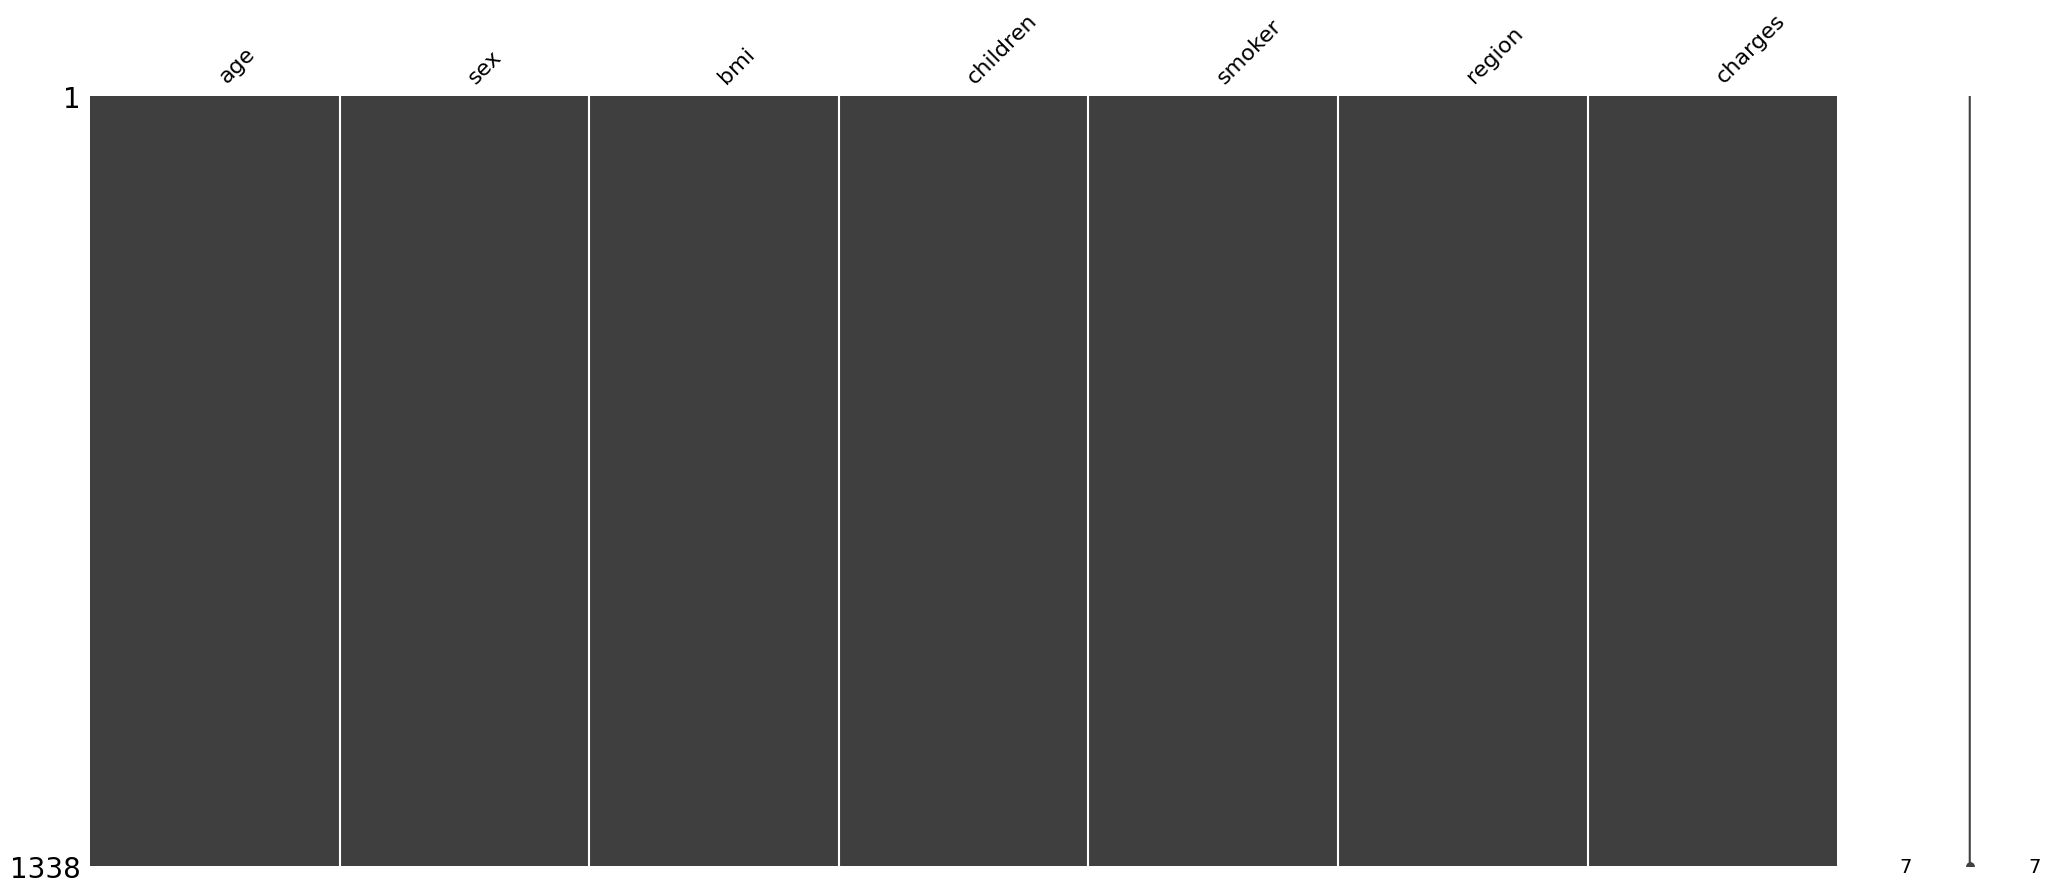

In [26]:
msno.matrix(df)

##  **12. Convertir variables Y a binaria.** No hace falta

## **13. Categorizar Variables String**

In [27]:
categoricas = df.select_dtypes(include=['object', 'category']).columns
print(categoricas)

Index(['sex', 'smoker', 'region'], dtype='object')


In [28]:
mapping_binary = {
    'no': 0,
    'yes': 1
}

df['smoker_encoded'] = df['smoker'].map(mapping_binary)
mapping_binary = {
    'female': 0,
    'male': 1
}

df['sex_encoded'] = df['sex'].map(mapping_binary)
mapping_region = {
    'southeast': 3,
    'southwest': 2,
    'northwest': 1,
    'northeast': 0,
}
df['region_encoded'] = df['region'].map(mapping_region)

## **14. Borrar las categorías que estaban en String**


In [29]:
df.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)

## **15. Hacer Train-Split**

In [30]:
X = df.drop('charges',axis=1)
y = df['charges']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.columns

Index(['age', 'bmi', 'children', 'smoker_encoded', 'sex_encoded',
       'region_encoded'],
      dtype='object')

In [33]:
X_train.shape

(1070, 6)

## **16. Imputar** Usamos librería Missforest, No hace falta

<Axes: >

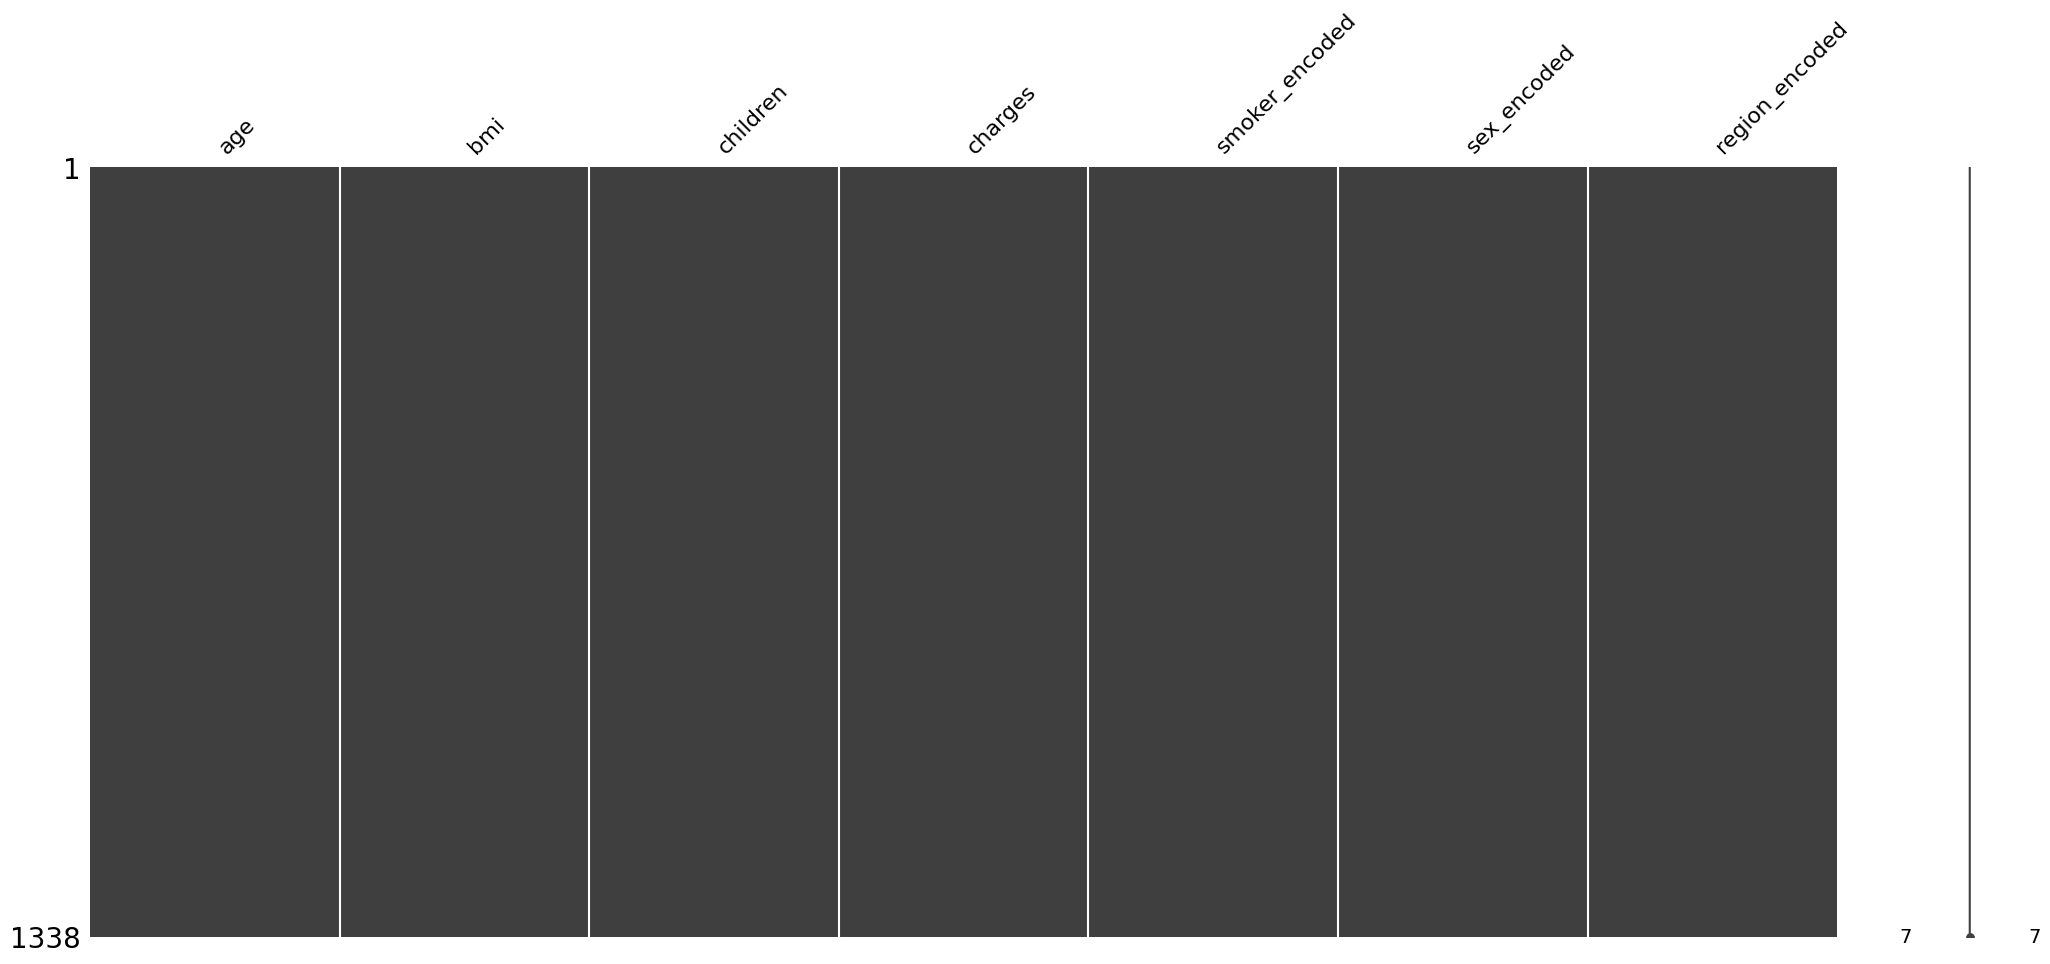

In [34]:
msno.matrix(df)

## **17.Outliers**

In [35]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1070.00,39.36,14.07,18.00,27.00,39.50,51.00,64.00
bmi,1070.00,30.56,6.04,15.96,26.20,30.21,34.50,53.13
children,1070.00,1.11,1.22,0.00,0.00,1.00,2.00,5.00
smoker_encoded,1070.00,0.21,0.40,0.00,0.00,0.00,0.00,1.00
sex_encoded,1070.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
region_encoded,1070.00,1.53,1.13,0.00,1.00,2.00,3.00,3.00


In [36]:
iso = IsolationForest(random_state=123)
df_num = X_train.copy()
df_num['outlier_flag'] = iso.fit_predict(X_train)

In [37]:
df_num['outlier_flag'].value_counts()

,count
outlier_flag,
-1,624
1,446


## **18.Selección de características**

Método 1: Feature importance de RF

In [38]:
# Entrenamiento de RF
model = RandomForestRegressor(random_state=42,n_jobs=-1).fit(X_train, y_train)

In [39]:
# Importancia de características
importances = model.feature_importances_/model.feature_importances_.sum()*100

# Convertir a DataFrame
df_rf_imp = pd.DataFrame({'feature': X_train.columns,'rf_importance': importances}).sort_values(by='rf_importance', ascending=False)

# Calculamos la importancia acumulada
df_rf_imp['rf_importance_acum'] = df_rf_imp['rf_importance'].cumsum()

In [40]:
df_rf_imp

,feature,rf_importance,rf_importance_acum
3,smoker_encoded,60.86,60.86
1,bmi,21.58,82.44
0,age,13.46,95.90
2,children,2.03,97.93
5,region_encoded,1.42,99.35
4,sex_encoded,0.65,100.00


Método 2: Permutation/Shuffle importance

In [41]:
# Para esta técnica y la de shap se necesita conjunto de validación
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Ajustamos el modelo
model_xgb = XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train1, y_train1)

In [42]:
# Realizamos 10 permutaciones por cada característica
perm = permutation_importance(model_xgb, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1, scoring='neg_mean_absolute_percentage_error')

In [43]:
df_perm_imp = pd.DataFrame({'feature': X_train.columns, 'perm_imp': perm.importances_mean*100}).sort_values('perm_imp', ascending=False)
df_perm_imp

,feature,perm_imp
3,smoker_encoded,80.87
0,age,51.90
2,children,13.43
1,bmi,4.53
5,region_encoded,2.80
4,sex_encoded,0.15


Método 3: SHAP

In [44]:
# Ajustamos el modelo
model_lgbm = lgb.LGBMRegressor(random_state=42, n_jobs=-1).fit(X_train1, y_train1)

explainer = shap.Explainer(model_lgbm, X_val)   # usa el mismo X_val
shap_vals = explainer(X_val).values

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 856, number of used features: 6
[LightGBM] [Info] Start training from score 13185.568183
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [45]:
imp_shap = np.abs(shap_vals).mean(axis=0)
imp_shap_pct = imp_shap/imp_shap.sum()*100
df_shap_imp = pd.DataFrame({"feature": X_val.columns, "shap_imp": imp_shap_pct}).sort_values('shap_imp', ascending=False)
df_shap_imp

,feature,shap_imp
3,smoker_encoded,54.15
0,age,20.26
1,bmi,16.37
2,children,4.22
5,region_encoded,3.22
4,sex_encoded,1.79


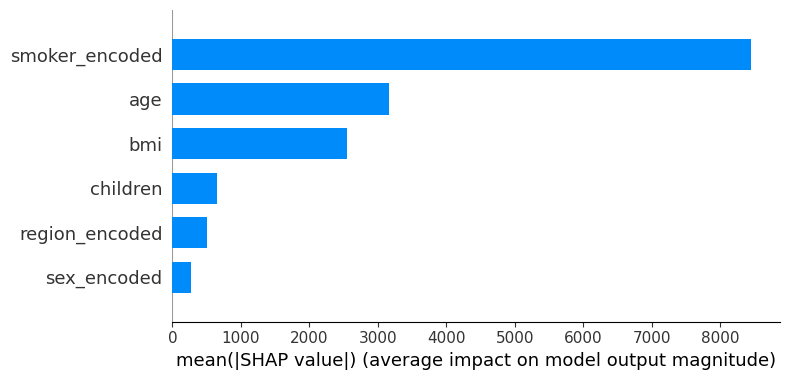

In [46]:
# --- SHAP Summary Bar Plot ---
shap.summary_plot(shap_vals, X_val, plot_type="bar")

Unión 3 métodos

In [47]:
df_importances = (
    df_rf_imp
    .merge(df_perm_imp, on='feature', how='outer')
    .merge(df_shap_imp, on='feature', how='outer')
).sort_values('rf_importance', ascending=False)
df_importances

,feature,rf_importance,rf_importance_acum,perm_imp,shap_imp
5,smoker_encoded,60.86,60.86,80.87,54.15
1,bmi,21.58,82.44,4.53,16.37
0,age,13.46,95.90,51.90,20.26
2,children,2.03,97.93,13.43,4.22
3,region_encoded,1.42,99.35,2.80,3.22
4,sex_encoded,0.65,100.00,0.15,1.79


In [48]:
df_filt = df_importances[(df_importances['rf_importance']>=1)&(df_importances['perm_imp']>=1)&(df_importances['shap_imp']>=1)]
df_filt

,feature,rf_importance,rf_importance_acum,perm_imp,shap_imp
5,smoker_encoded,60.86,60.86,80.87,54.15
1,bmi,21.58,82.44,4.53,16.37
0,age,13.46,95.90,51.90,20.26
2,children,2.03,97.93,13.43,4.22
3,region_encoded,1.42,99.35,2.80,3.22


OPCIONAL PARA LA PRÁCTICA DEL EDA

In [49]:
features = df_filt['feature']
features

,feature
5,smoker_encoded
1,bmi
0,age
2,children
3,region_encoded


In [50]:
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train[features])

vif = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns)
vif = vif.drop("const")
vif

,0
smoker_encoded,1.00
bmi,1.09
age,1.02
children,1.00
region_encoded,1.07


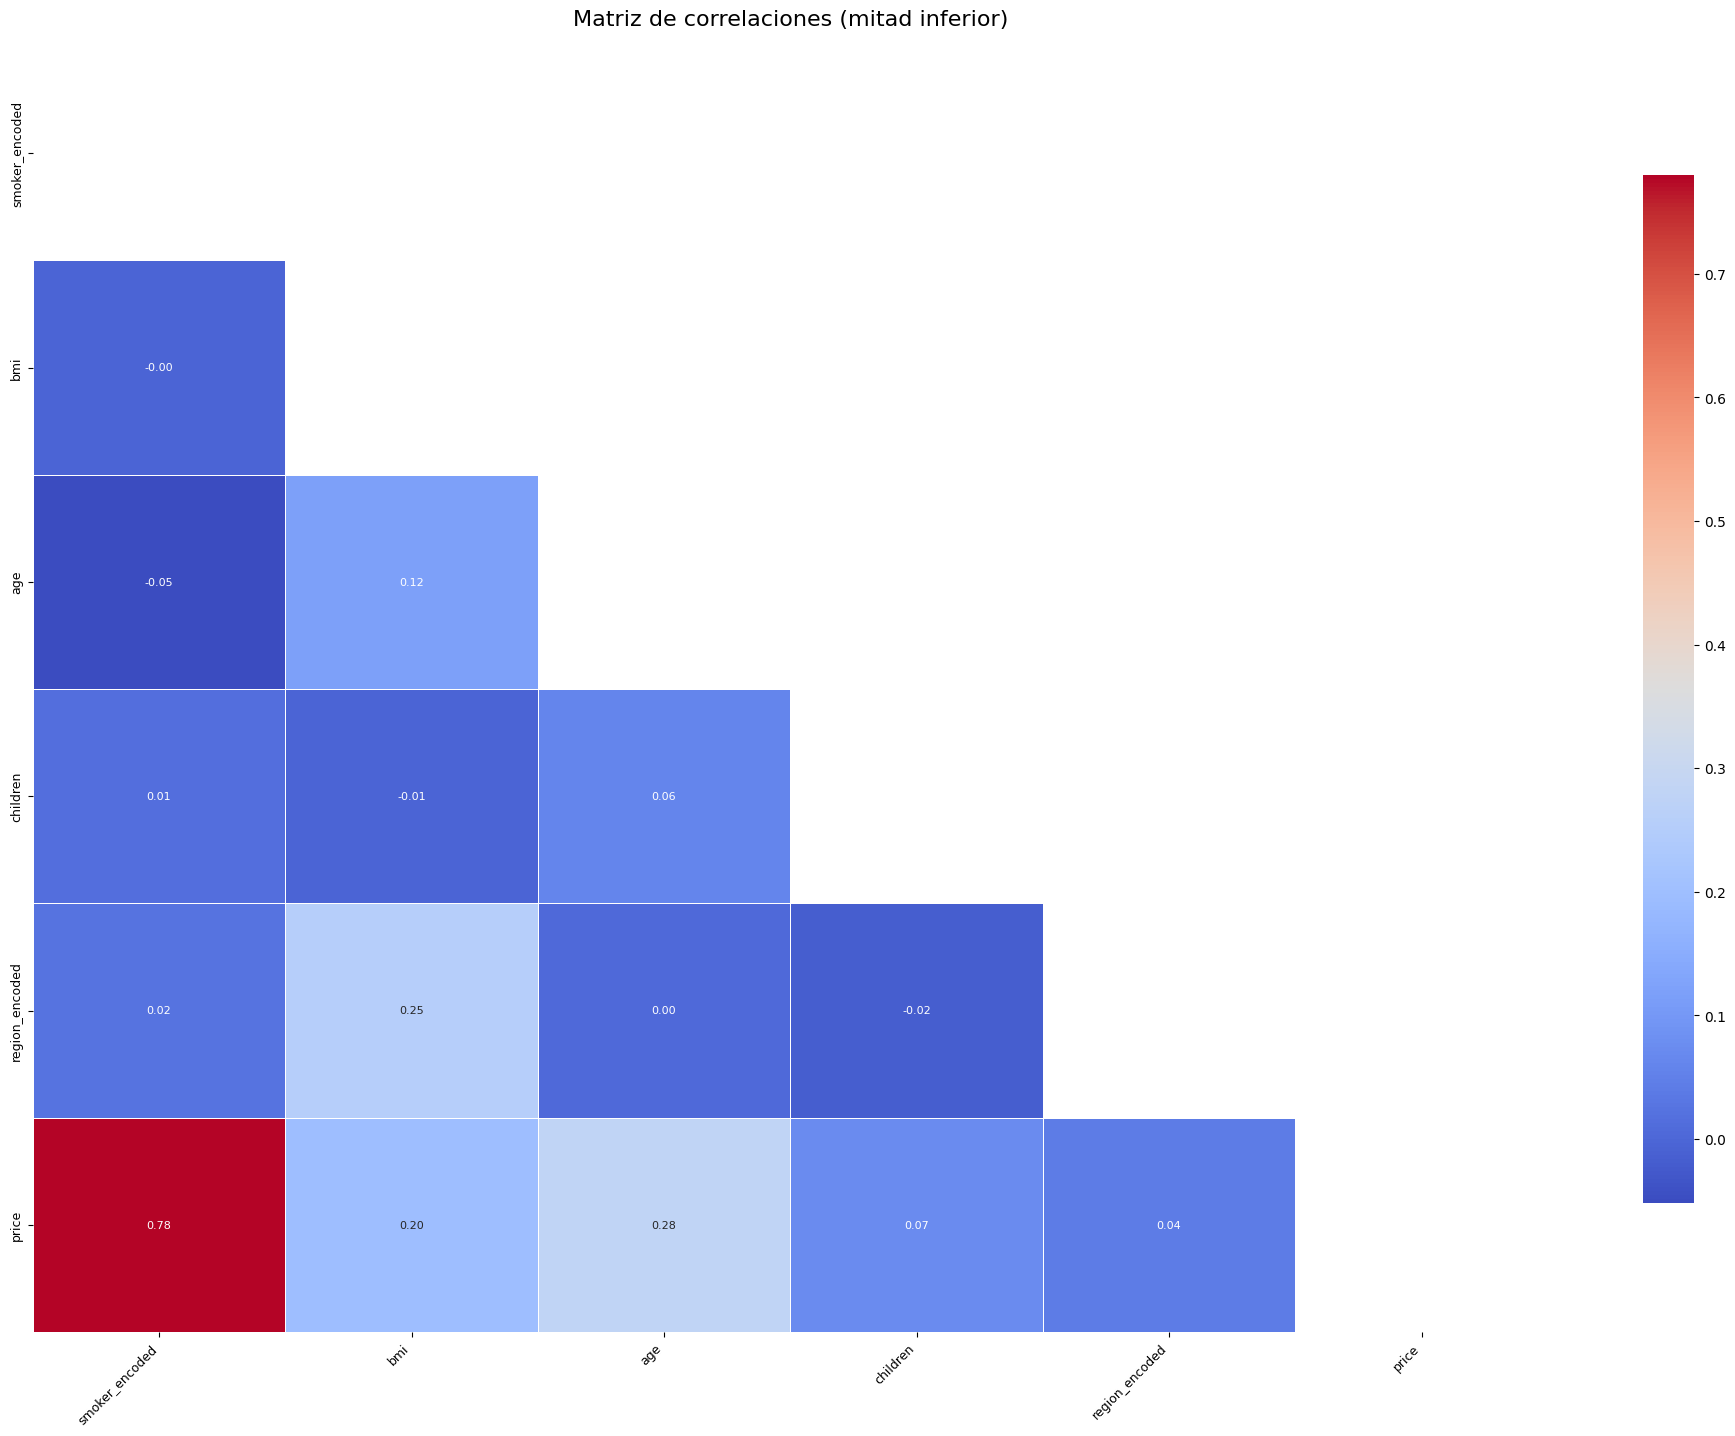

In [51]:
X_copy = X_train[features].copy()
X_copy['price'] = y_train
corr = X_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(
    corr, mask=mask, cmap='coolwarm',
    annot=True, fmt=".2f", linewidths=.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 8}
)
plt.title("Matriz de correlaciones (mitad inferior)", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout(pad=3.0)
plt.show()

## **19.Cross_Validation**

In [52]:
# Versión 1: Realizar cross_validation con todas las características que son candidatas
cv_results1 = cross_val_score(RandomForestRegressor(random_state=42,n_jobs=-1), X_train[features], y_train, cv=3, scoring='neg_mean_absolute_percentage_error')

In [53]:
cv_results1.mean()*-1

np.float64(0.35541871144076875)

## **20.Modelado**

In [54]:
# Selecciona la caracteristicas con las que hemos determinado que vamos a proseguir el análisis
X_train_sel = X_train[features]
X_test_sel = X_test[features]

In [55]:
X_train_sel.describe().T

,count,mean,std,min,25%,50%,75%,max
smoker_encoded,1070.00,0.21,0.40,0.00,0.00,0.00,0.00,1.00
bmi,1070.00,30.56,6.04,15.96,26.20,30.21,34.50,53.13
age,1070.00,39.36,14.07,18.00,27.00,39.50,51.00,64.00
children,1070.00,1.11,1.22,0.00,0.00,1.00,2.00,5.00
region_encoded,1070.00,1.53,1.13,0.00,1.00,2.00,3.00,3.00


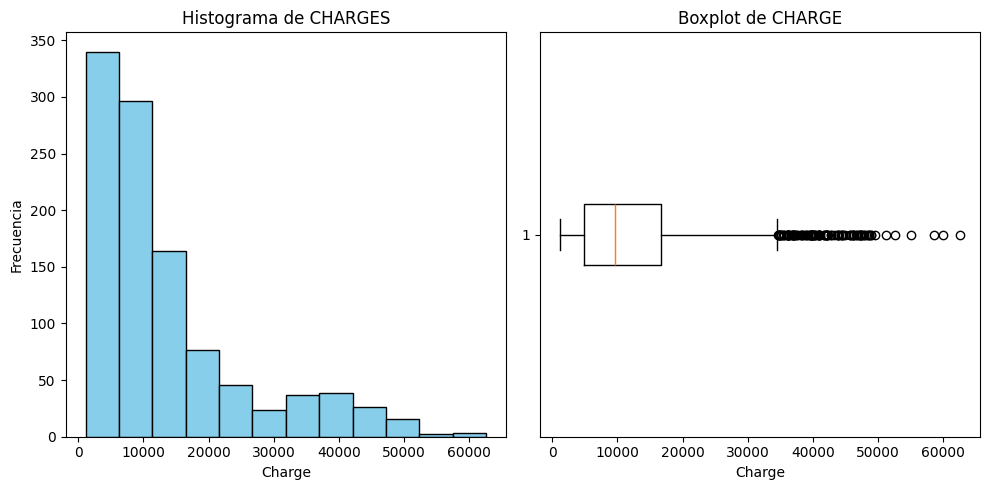

In [56]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(y_train, bins='sturges', color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de CHARGES')
ax[0].set_xlabel('Charge')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(y_train, vert=False)
ax[1].set_title('Boxplot de CHARGE')
ax[1].set_xlabel('Charge')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [57]:
y_train.skew()

np.float64(1.5154267353397535)

In [58]:
y_train.describe()

,charges
count,1070.00
mean,13346.09
std,12019.51
min,1121.87
25%,4897.67
50%,9575.44
75%,16746.66
max,62592.87


In [59]:
# Transformamos la variable respuesta en escala logarítmica
y_train = np.log(y_train)
y_test = np.log(y_test)

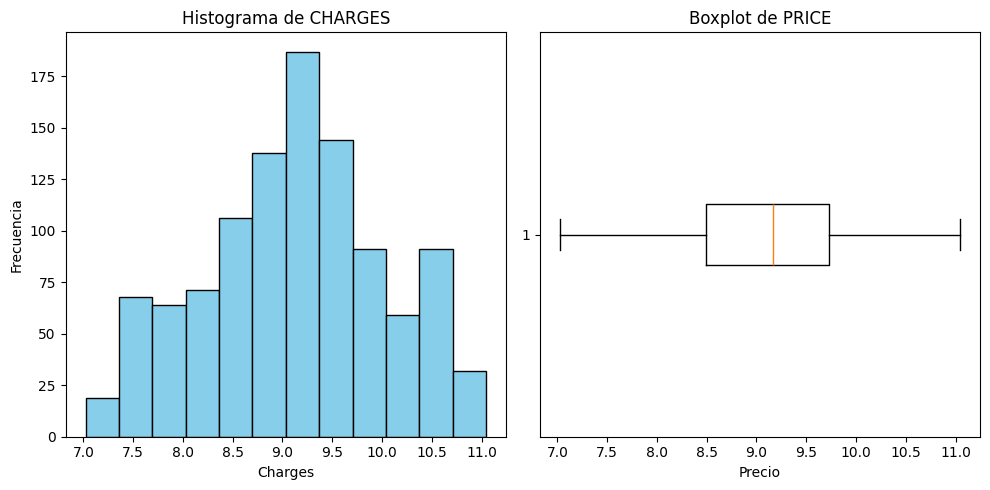

In [60]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(y_train, bins='sturges', color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de CHARGES')
ax[0].set_xlabel('Charges')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(y_train, vert=False)
ax[1].set_title('Boxplot de PRICE')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

## **21.Escalar los datos**

In [61]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train_sel)
X_test_sc = scaler.transform(X_test_sel)

In [62]:
df_plot = X_train_sel.copy()
df_plot['charges'] = y_train.values

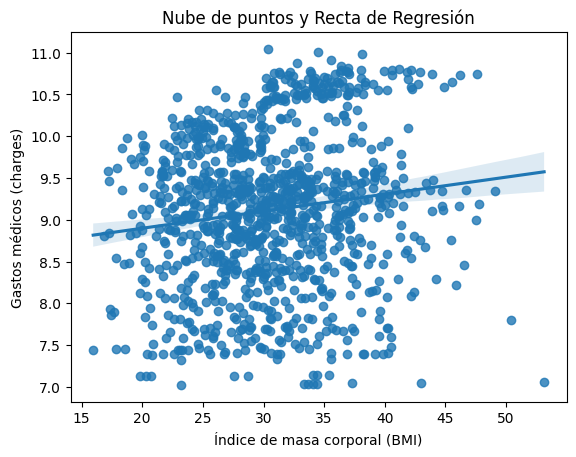

In [63]:
sns.regplot(x='bmi', y='charges', data=df_plot)
plt.title("Nube de puntos y Recta de Regresión")
plt.xlabel("Índice de masa corporal (BMI)")
plt.ylabel("Gastos médicos (charges)")
plt.show()

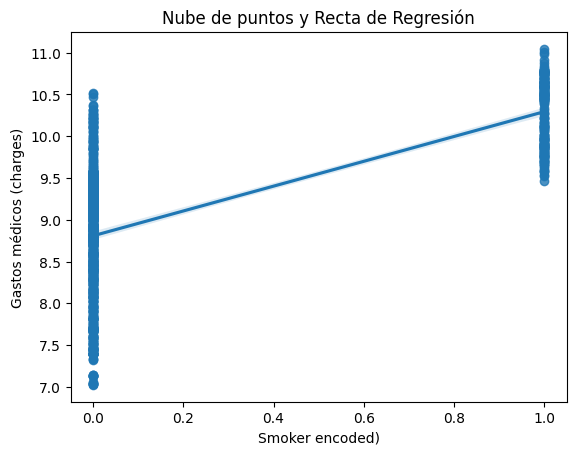

In [64]:
sns.regplot(x='smoker_encoded', y='charges', data=df_plot)
plt.title("Nube de puntos y Recta de Regresión")
plt.xlabel("Smoker encoded)")
plt.ylabel("Gastos médicos (charges)")
plt.show()

In [65]:
X_train_const = sm.add_constant(X_train_sel)

# 2️⃣ creamos el modelo
model = sm.OLS(y_train, X_train_const)

# 3️⃣ entrenamos el modelo
results = model.fit()

# 4️⃣ mostramos el resumen
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     657.1
Date:                Wed, 26 Nov 2025   Prob (F-statistic):          2.91e-322
Time:                        21:48:09   Log-Likelihood:                -665.43
No. Observations:                1070   AIC:                             1343.
Df Residuals:                    1064   BIC:                             1373.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.0007      0.079     88.

In [66]:
residuos = results.resid

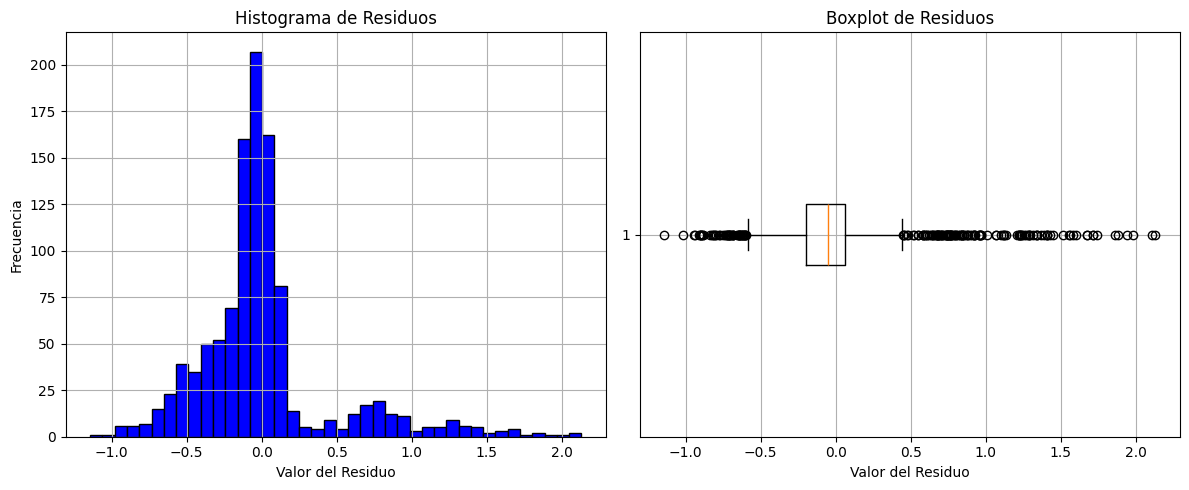

In [67]:
# Crea una figura con dos subgráficos (uno para el histograma y otro para el boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de los residuos en el primer subgráfico (ax1)
ax1.hist(residuos, bins=40, color='blue', edgecolor='black')
ax1.set_title('Histograma de Residuos')
ax1.set_xlabel('Valor del Residuo')
ax1.set_ylabel('Frecuencia')
ax1.grid(True)

# Boxplot de los residuos en el segundo subgráfico (ax2)
ax2.boxplot(residuos, vert=False)
ax2.set_title('Boxplot de Residuos')
ax2.set_xlabel('Valor del Residuo')
ax2.grid(True)

# Muestra la figura con ambos gráficos
plt.tight_layout()  # Ajusta los márgenes para evitar superposiciones
plt.show()

## **22. Comparativa de Algoritmos**

In [68]:
# Tenemos que obtener un conjunto de validación para validar la decisión de qué algoritmo elegir
X_train_sc1, X_val_sc, y_train1, y_val = train_test_split(X_train_sc, y_train, test_size=0.2, random_state=42)

In [69]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_sc1, X_val_sc, y_train1, y_val)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 318
[LightGBM] [Info] Number of data points in the train set: 856, number of used features: 5
[LightGBM] [Info] Start training from score 9.104676
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [70]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.75,0.76,0.46,0.52
SVR,0.75,0.75,0.46,0.09
NuSVR,0.73,0.74,0.47,0.27
HistGradientBoostingRegressor,0.73,0.74,0.47,0.91
LGBMRegressor,0.73,0.74,0.47,0.11
RandomForestRegressor,0.72,0.72,0.49,0.99
KNeighborsRegressor,0.71,0.72,0.49,0.09
SGDRegressor,0.71,0.71,0.49,0.02
BayesianRidge,0.71,0.71,0.50,0.08


## **23.Reentrenar con todo el conjunto de entrenamiento y probar en el test**

In [74]:
# Espacio de búsqueda
param_dist = {
    'num_leaves': randint(20, 200),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(100, 1500),
    'max_depth': randint(-1, 20),
    'min_child_samples': randint(10, 200),
}

model = lgb.LGBMRegressor(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,                  # Número de combinaciones aleatorias a probar
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=4,
    n_jobs=-1,
    random_state=123
)

random_search.fit(X_train_sc1, y_train1)

print("Mejores hiperparámetros:")
print(random_search.best_params_)

best_model = random_search.best_estimator_
print(best_model)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 318
[LightGBM] [Info] Number of data points in the train set: 856, number of used features: 5
[LightGBM] [Info] Start training from score 9.104676
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [75]:
best_model.fit(X_train[features], y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 315
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 5
[LightGBM] [Info] Start training from score 9.113322
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMRegressor(learning_rate=np.float64(0.15733568002977918), max_depth=0,
              min_child_samples=106, n_estimators=213, num_leaves=146,
              random_state=42)

In [80]:
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

In [81]:
yhat_test = np.exp(best_model.predict(X_test[features]))
yhat_train = np.exp(best_model.predict(X_train[features]))
metricas = get_metrics(yhat_test, np.exp(y_test), yhat_train, np.exp(y_train))

In [82]:
metricas

,R2,Median AE,MAPE
Train set,0.87,837.81,16.32
Test set,0.87,874.36,18.11
Diferencia,0.00,36.55,1.79
